In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
###Copy this for other files for full database combined
df06 = pd.read_csv("./Data/RB Research Data - 2006-2007.csv")
df07 = pd.read_csv("./Data/RB Research Data - 2007-2008.csv")
df08 = pd.read_csv("./Data/RB Research Data - 2008-2009.csv")
df09 = pd.read_csv("./Data/RB Research Data - 2009-2010.csv")
df10 = pd.read_csv("./Data/RB Research Data - 2010-2011.csv")
df11 = pd.read_csv("./Data/RB Research Data - 2011-2012.csv")
df12 = pd.read_csv("./Data/RB Research Data - 2012-2013.csv")
df13 = pd.read_csv("./Data/RB Research Data - 2013-2014.csv")
df14 = pd.read_csv("./Data/RB Research Data - 2014-2015.csv")
df15 = pd.read_csv("./Data/RB Research Data - 2015-2016.csv")
df16 = pd.read_csv("./Data/RB Research Data - 2016-2017.csv")
df17 = pd.read_csv("./Data/RB Research Data - 2017-2018.csv")
df18 = pd.read_csv("./Data/RB Research Data - 2018-2019.csv")
df19 = pd.read_csv("./Data/RB Research Data - 2019-2020.csv")
df20 = pd.read_csv("./Data/RB Research Data - 2020-2021.csv")
df21 = pd.read_csv("./Data/RB Research Data - 2021-2022.csv")
df22 = pd.read_csv("./Data/RB Research Data - 2022-2023.csv")
df = pd.concat([df06, df07, df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22])
df = df[df['AAV Adjusted'] != -1]
df = df[df["Games Played"] > 8]


In [3]:
#Get nonrookie contract players who played at least half the season
vets = df[df["Rookie Contract (Y/N)"] == "Y"]
vets = vets[vets["Games Played"] > 8]
vets

,Player Name,Team,Year,Rookie Contract (Y/N),Contract Length,Total Pay,Yearly Pay (AAV),Team Payroll,Player Percentage of Payroll,Games Played,...,Team Rushing Yards,Team Total Yards,Team Total Touchdowns,Player Percentage of Rushing Yards,Player Percentage of Offensive Yards,Player Percentage of Touchdowns,AAV Adjusted,Total Pay Adjusted,Payroll Adjusted,Unnamed: 0
3,Willis McGahee,BUF,2006,Y,5.0,7053000.0,1410600.00,102000000,0.013829,14,...,1552,4271,28,0.641108,0.269492,0.214286,2148343.800,1.074172e+07,155346000.0,NaN
8,Julius Jones,DAL,2006,Y,4.0,3280000.0,820000.00,102000000,0.008039,17,...,1936,5772,47,0.617769,0.231809,0.085106,1248860.000,4.995440e+06,155346000.0,NaN
9,Tatum Bell,DEN,2006,Y,4.0,3180000.0,795000.00,102000000,0.007794,13,...,2152,4951,32,0.473978,0.229247,0.062500,1210785.000,4.843140e+06,155346000.0,NaN
10,Kevin Jones,DET,2006,Y,5.0,5737500.0,1147500.00,102000000,0.011250,12,...,1129,4949,30,0.608503,0.241463,0.266667,1747642.500,8.738212e+06,155346000.0,NaN
13,Joseph Addai,IND,2006,Y,5.0,10665000.0,2133000.00,102000000,0.020912,20,...,1762,6070,48,0.777526,0.298682,0.208333,3248559.000,1.624280e+07,155346000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,Saquon Barkley,NYG,2022,Y,4.0,31194751.0,7798687.75,203667109,0.038291,18,...,2519,5676,38,0.566098,0.324348,0.315789,8180823.450,3.272329e+07,213646797.3,NaN
25,Miles Sanders,PHI,2022,Y,4.0,5350175.0,1337543.75,219359743,0.006097,20,...,2509,6614,57,0.565564,0.226792,0.228070,1403083.394,5.612334e+06,230108370.4,NaN
26,Najee Harris,PIT,2022,Y,4.0,13047447.0,3261861.75,210658592,0.015484,17,...,2073,5484,28,0.500724,0.231036,0.357143,3421692.976,1.368677e+07,220980863.0,NaN
28,Kenneth Walker III,SEA,2022,Y,4.0,8441581.0,2110395.25,215796566,0.009780,16,...,2042,5976,42,0.545054,0.214357,0.238095,2213804.617,8.855218e+06,226370597.7,NaN


In [4]:
X = vets["All-Purpose Yards"].values.reshape(-1, 1)
y = vets["AAV Adjusted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression = LinearRegression()
regression.fit(X, y)
y_pred = regression.predict(X_test)
regression.score(X_test, y_test)

-0.027098755870558433

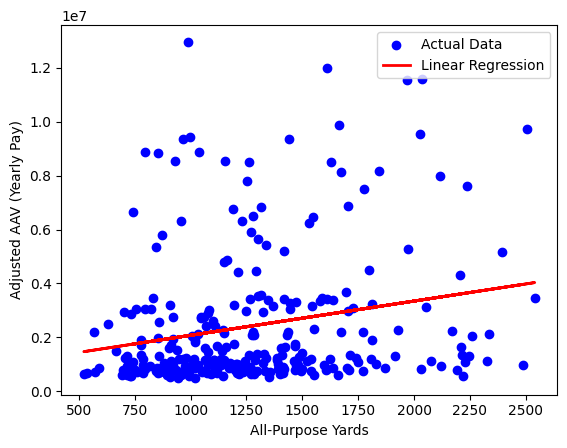

In [5]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('All-Purpose Yards')
plt.ylabel('Adjusted AAV (Yearly Pay)')
plt.legend()
plt.show()

In [6]:
rush = df.groupby('Year')['Rush Yards'].mean()
rec = df.groupby('Year')['Recieving Yards'].mean()


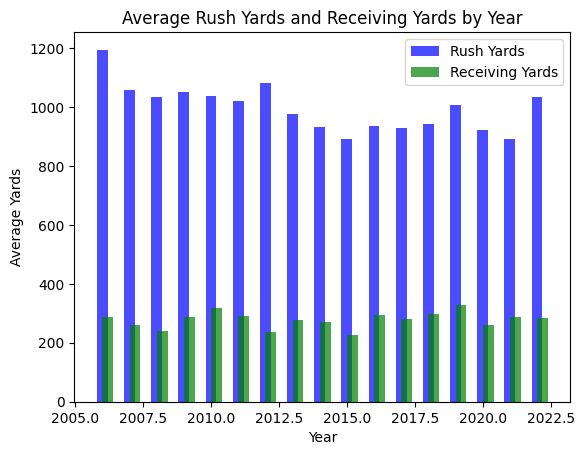

In [7]:
plt.bar(rush.index, rush, width=0.4, label='Rush Yards', align='center', color='b', alpha=0.7)
plt.bar(rec.index, rec, width=0.4, label='Receiving Yards', align='edge', color='g', alpha=0.7)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Yards')
plt.title('Average Rush Yards and Receiving Yards by Year')
plt.legend()

# Show the plot
plt.show()

In [8]:
rooks = df[df["Rookie Contract (Y/N)"] == "N"]

r_rush = rooks.groupby('Year')['Rush Yards'].mean()
r_rec = rooks.groupby('Year')['Recieving Yards'].mean()
v_rush = vets.groupby('Year')['Rush Yards'].mean()
v_rec = vets.groupby('Year')['Recieving Yards'].mean()



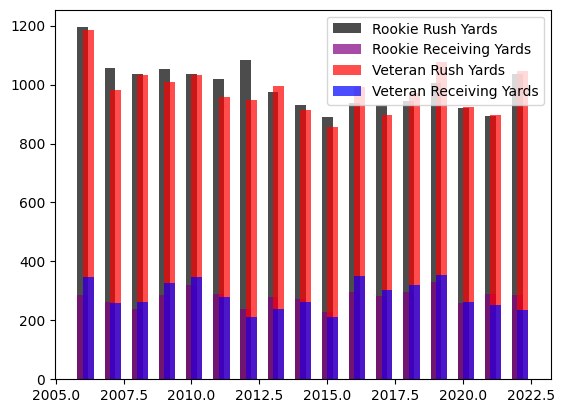

In [9]:
plt.bar(rush.index, rush, width=0.4, label='Rookie Rush Yards', align='center', color='black', alpha=0.7)
plt.bar(rec.index, rec, width=0.4, label='Rookie Receiving Yards', align='center', color='purple', alpha=0.7)
plt.bar(v_rush.index, v_rush, width=0.4, label='Veteran Rush Yards', align='edge', color='r', alpha=0.7)
plt.bar(v_rec.index, v_rec, width=0.4, label='Veteran Receiving Yards', align='edge', color='b', alpha=0.7)
plt.legend()

Text(0.5, 1.0, 'Rookie and Veteran Yards Comparison')

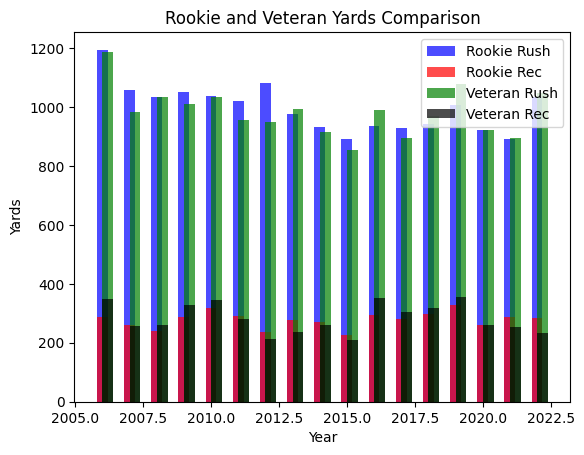

In [10]:
bar_width = 0.4
rookie_indices = rush.index
plt.bar(rookie_indices, rush, width=bar_width, label='Rookie Rush', align='center', color='blue', alpha=0.7)
plt.bar(rookie_indices, rec, width=bar_width, label='Rookie Rec', align='center', color='red', alpha=0.7)

# Veteran statistics
veteran_indices = v_rush.index
plt.bar(veteran_indices, v_rush, width=bar_width, label='Veteran Rush', align='edge', color='green', alpha=0.7)
plt.bar(veteran_indices, v_rec, width=bar_width, label='Veteran Rec', align='edge', color='black', alpha=0.7)

# Add legend
plt.legend()

# Add labels and title as needed
plt.xlabel('Year')
plt.ylabel('Yards')
plt.title('Rookie and Veteran Yards Comparison')

In [11]:
r_apy = rooks.groupby('Year')['All-Purpose Yards'].mean()
v_apy = vets.groupby('Year')['All-Purpose Yards'].mean()

Text(0.5, 1.0, 'Rookie and Veteran All-Purpose Yards Comparison')

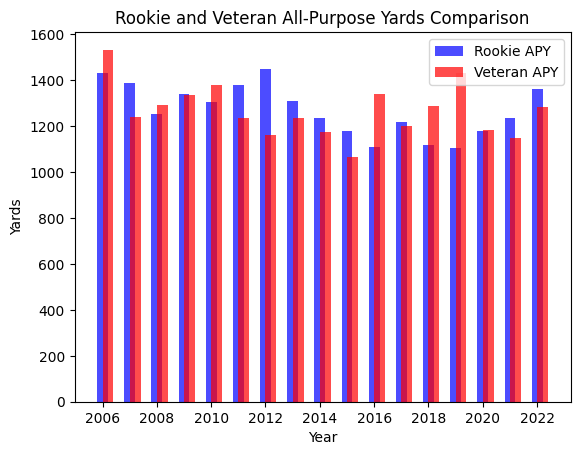

In [13]:
plt.bar(r_apy.index, r_apy, width=0.4, label='Rookie APY', align='center', color='blue', alpha=0.7)
plt.bar(v_apy.index, v_apy, width=0.4, label='Veteran APY', align='edge', color='red', alpha=0.7)
plt.legend()
plt.xticks(list(map(int, r_apy.index[::2])))
plt.xlabel('Year')
plt.ylabel('Yards')
plt.title('Rookie and Veteran All-Purpose Yards Comparison')

In [14]:
percentage_difference = ((r_apy - v_apy) / v_apy) * 100
percentage_difference

Year
2006    -6.633086
2007    11.815476
2008    -3.109733
2009     0.401730
2010    -5.566042
2011    11.429725
2012    24.759391
2013     5.939639
2014     4.989914
2015    10.993566
2016   -17.421260
2017     1.657093
2018   -13.141918
2019   -22.824329
2020    -0.486892
2021     7.663519
2022     6.321026
Name: All-Purpose Yards, dtype: float64

In [15]:
percentage_difference.mean()

0.9875187863353553